In [79]:
import gzip
from IPython.display import display, clear_output


contributions_xml = gzip.open('data/dblp.xml.gz','r')

In [80]:
types = ['article','inproceedings','www','proceedings','book','incollection','phdthesis','mastersthesis','www']
contributions =  {t:[] for t in types}
begin = False

for key,line in enumerate(contributions_xml):
    line = str(line)
    for t in types:
        if '</' + t in line:
            begin = False
            contributions[t].append(contribution)
            break
    
    if begin:
        if '<' in line:
            vals = line.replace('<','>').split('>')
            vals[1] = vals[1].split(' ')[0]
            if vals[1] in contribution:
                contribution[vals[1]] += ', ' + vals[2]
            else:
                contribution[vals[1]] = vals[2]
            
    for t in types:
        if '<' + t in line:
            begin = True
            contribution = {}
            break

    if key % 50000 == 0 and key != 0:
        clear_output(wait=True)
        print("Imported: {}".format(sum([len(contributions[t]) for t in types])))

Imported: 11616873


In [192]:
contributions['incollection'][5]

{'url': 'db/journals/lncs/lncs701.html#ArtaleBCCCFLGMM93',
 'ee': 'https://doi.org/10.1007/BFb0021901'}

In [199]:
import pandas as pd

data = []
for t in types:
    data.extend(contributions[t])

df = pd.DataFrame.from_dict(data)

# articles = pd.DataFrame.from_dict(contributions['articles'])
# inproceedings = pd.DataFrame.from_dict(contributions['inproceedings'])

In [202]:
len(df)

11618432

In [203]:
df_f = df[['author','title','year']].dropna()
len(df_f)

4511660

In [204]:
df_f.describe()

,author,title,year
count,4511660,4511660,4511660
unique,3201560,4400672,85
top,T. D. Wilson 0001,Editorial.,2018
freq,338,4684,328031


In [208]:
df_f['author'] = df_f['author'].str.replace('&|;|\d+','',regex=True)
df_f.sample(1000)

,author,title,year
7688221,"Mathis Obadia, Jean-Louis Rougier, Luigi Ianno...",Revisiting NFV orchestration with routing games.,2016
6853567,"Isis D. Rosello, John Craig Comfort",Simulation of queuing systems on a highly para...,1993
7590886,Scott E. Decatur,Learning in Hybrid Noise Environments Using St...,1995
666267,"Marcin Procek, Agnieszka Stolarczyk, Tadeusz P...",A Study of a QCM Sensor Based on TiO,2015
1297042,Sang C. Park,Knowledge capturing methodology in process pla...,2003
8095353,"Wanshi Chen, Urbashi Mitra, Michael J. Neely",Packet Dropping Algorithms for Energy Savings.,2006
8906919,"Antti Koto, Shengye Lu, Turo Valavaara, Antti ...",Aggregation of small-scale active resources fo...,2011
230490,"Benjamin Carrioacuten Schaumlfer, Kazutoshi Wa...",Precision tunable RTL macro-modelling cycle-ac...,2011
1357299,"Carl Oumlhman, Luciano Floridi",The Political Economy of Death in the Age of I...,2017
257551,"Raphael Linker, Ido Seginer",Greenhouse temperature modeling: a comparison ...,2004


In [217]:
df_f[df_f['author'].str.contains('Jure Leskovec')].sort_values(by=['year'])

,author,title,year
8607643,"Jure Leskovec, John Shawe-Taylor",Linear Programming Boosting for Uneven Datasets.,2003
724054,"Janez Brank, Jure Leskovec",The Download Estimation task on KDD Cup 2003.,2003
8284809,"Jure Leskovec, Jon M. Kleinberg, Christos Falo...","Graphs over time: densification laws, shrinkin...",2005
7155107,"Jure Leskovec, Deepayan Chakrabarti, Jon M. Kl...","Realistic, Mathematically Tractable Graph Gene...",2005
7762990,"Jure Leskovec, Natasa Milic-Frayling, Marko Gr...",Impact of Linguistic Analysis on the Semantic ...,2005
1362274,"Jure Leskovec, Purnamrita Sarkar, Carlos Guestrin",Modeling Link Qualities in a Sensor Network.,2005
1080333,"Jure Leskovec, Lada A. Adamic, Bernardo A. Hub...",The Dynamics of Viral Marketing,2005
8606648,"Andreas Krause , Jure Leskovec, Carlos Guestrin",Data association for topic intensity tracking.,2006
7494077,"Joseacute Fernando Rodrigues Jr., Hanghang Ton...","GMine: A System for Scalable, Interactive Grap...",2006
8757615,"Jure Leskovec, Ajit Singh, Jon M. Kleinberg",Patterns of Influence in a Recommendation Netw...,2006


In [219]:
years = df_f.groupby('year').count()
years

,author,title
year,,
1936,12,12
1937,15,15
1938,11,11
1939,18,18
1940,10,10
1941,13,13
1942,13,13
1943,8,8
1944,5,5


In [212]:
from collections import Counter
import string
import nltk 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

frequencies = {}
for year in years.index:
    frequencies[year] = Counter()
    for key,title in enumerate(articles_f[articles_f['year'] == year]['title']):
        for word in title.replace('\n',' ').split(' '):
            filtered_word = word.lower().translate(str.maketrans('', '', string.punctuation))
            if filtered_word not in stop_words:
                filtered_word = lem.lemmatize(filtered_word,"v")
                frequencies[year][filtered_word] += 1
    if int(year) % 5 == 0:
        clear_output(wait=True)
        print("{}".format(year))

2020


In [214]:
for year in frequencies:
    total = sum(frequencies[year].values())
    for word in frequencies[year]:
        frequencies[year][word] = (frequencies[year][word] * 100) / float(total)
        
change = {}

skip = 0
for year in frequencies:
    if skip < 2:
        skip += 1
        continue
    change[year] = Counter()
    for word in frequencies[year]:
        change[year][word] = frequencies[year][word] - frequencies[str(int(year)-1)][word] - frequencies[str(int(year)-2)][word]   

In [215]:
import wordcloud 
import matplotlib.pyplot as plt

def generate_word_cloud(freq):
    for key in ['2000','2004','2008','2012','2016','2018']:
        key = str(key)
        try:
            wc = wordcloud.WordCloud(background_color="white", max_words=100, width=800, height=400)
            wc.generate_from_frequencies(frequencies=freq[key])
            plt.figure(figsize=(20,10))
            plt.imshow(wc, interpolation="bilinear")
            plt.axis("off")
            plt.savefig("results/" + key + '.png', bbox_inches='tight',dpi = 200)
        except:
            print(key)

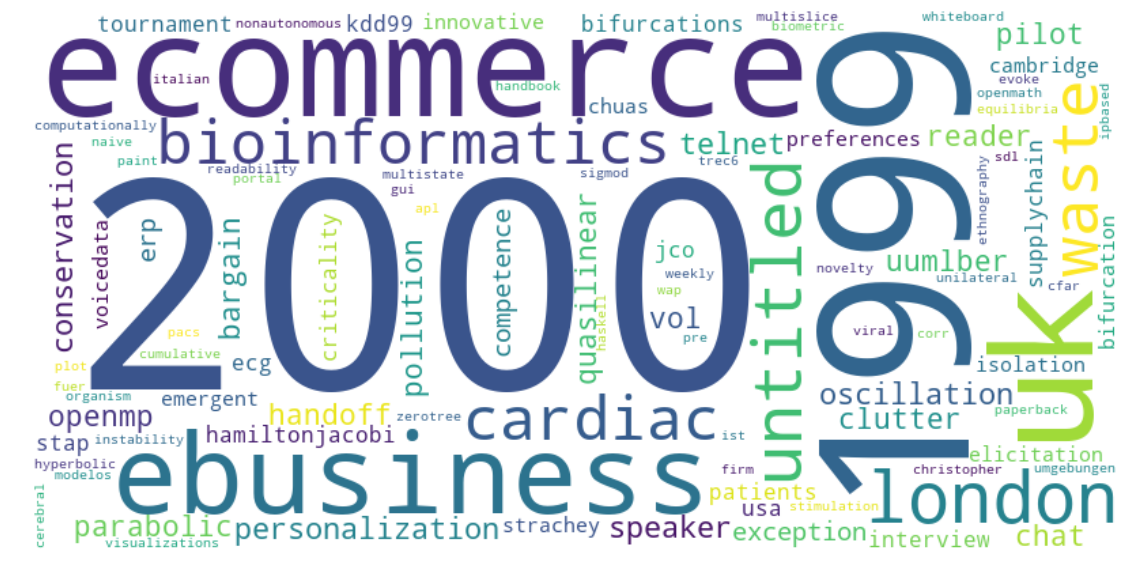

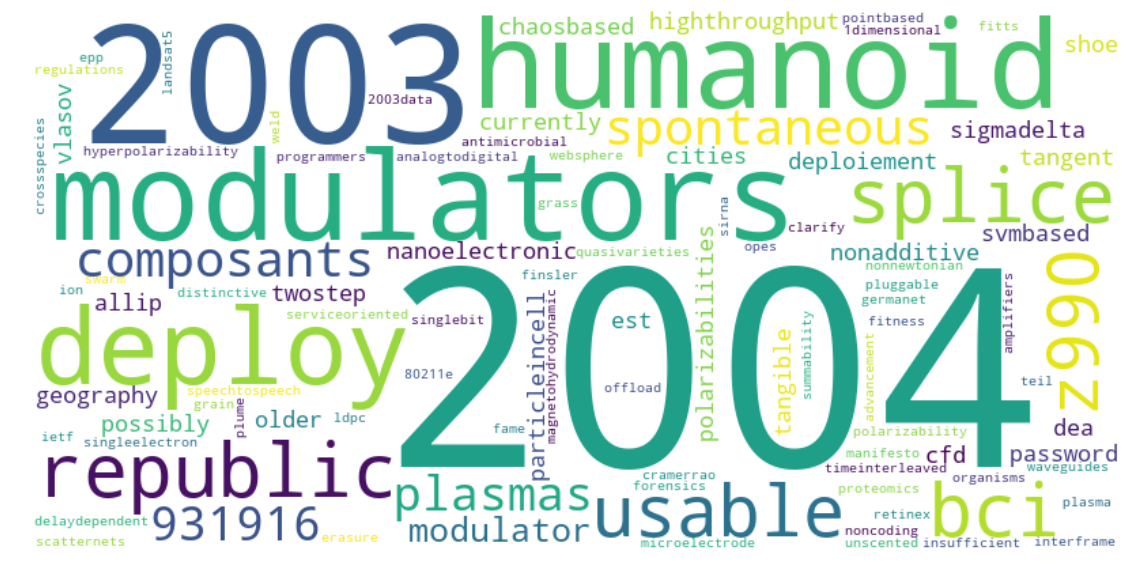

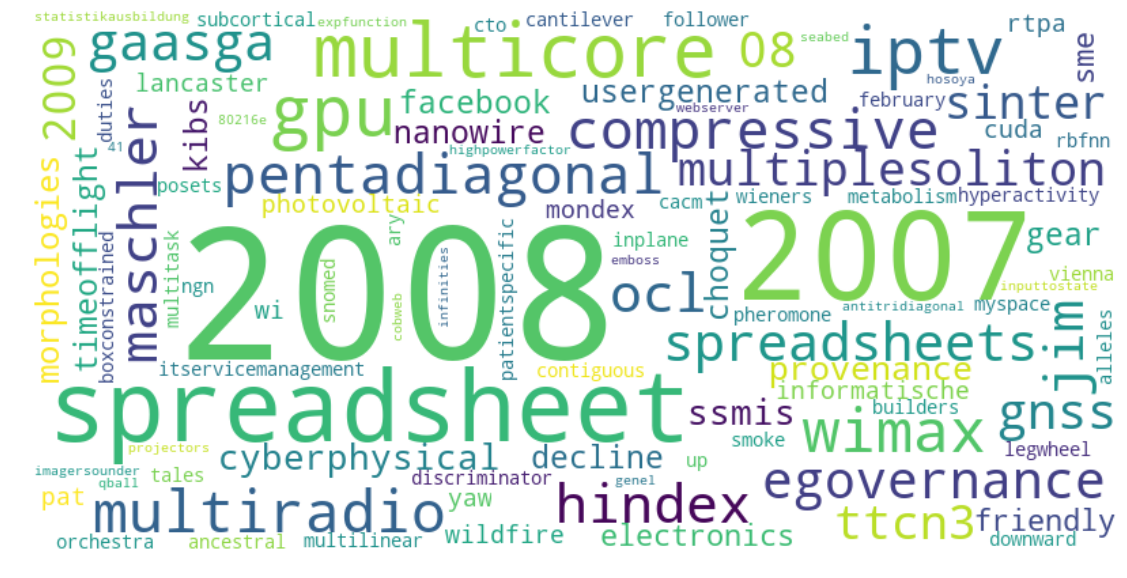

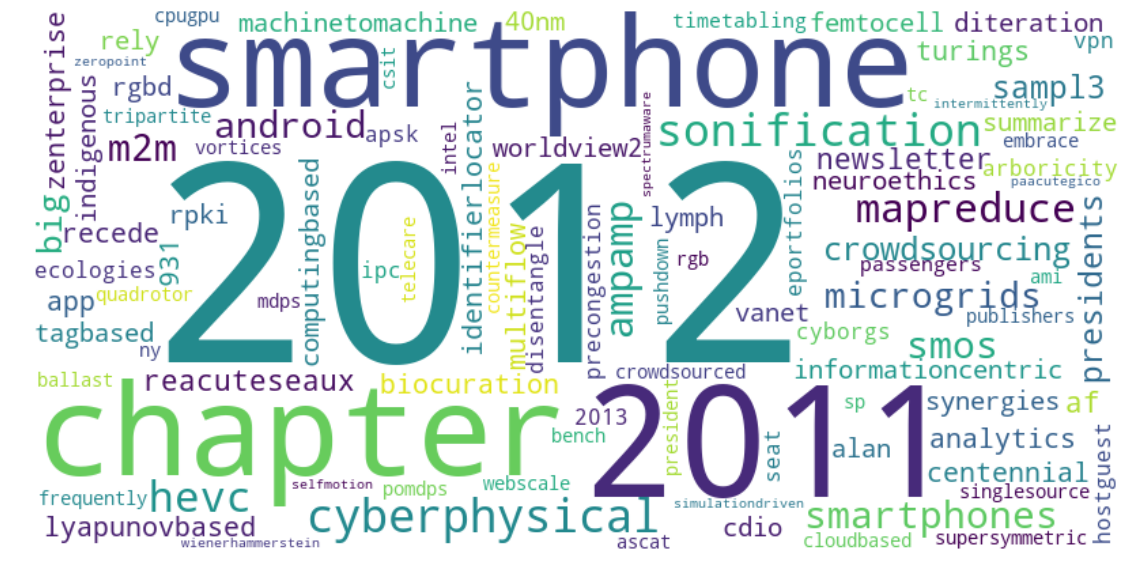

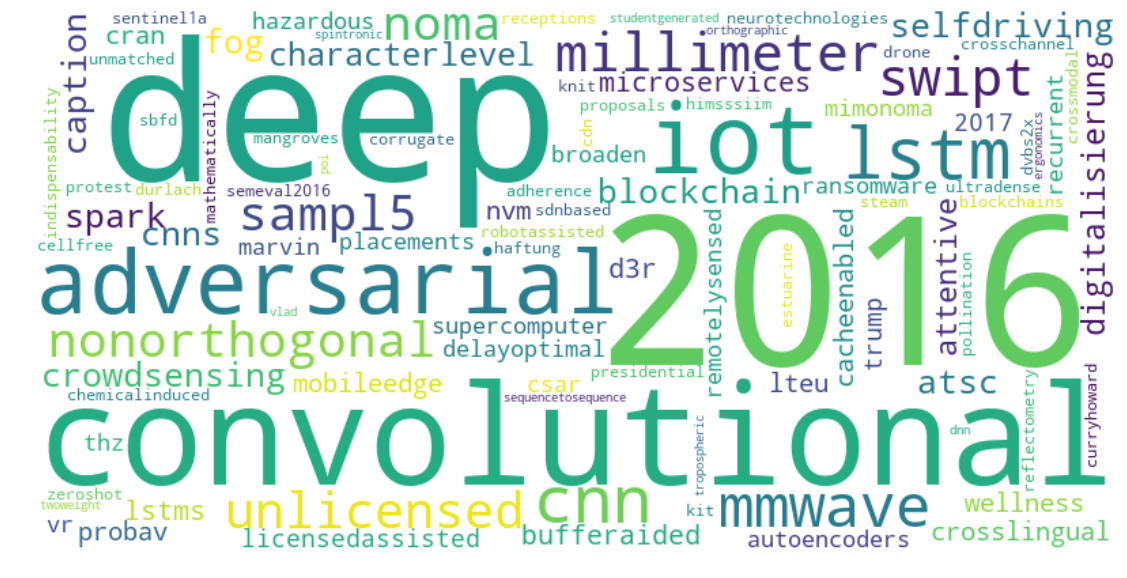

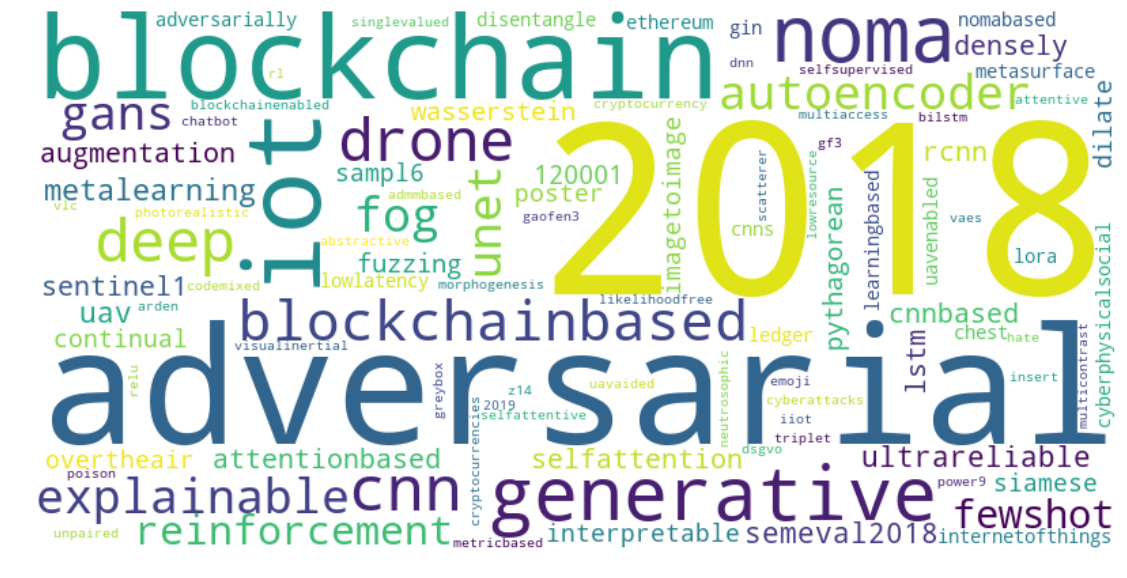

In [216]:
generate_word_cloud(change)

If we choose one random author at the beginning and then add all authors who co-authored papers with him and all their co-authors ... we end up with over 1 million authors. This can be quantified as a metric for sure.

In [235]:
import random

authors = df_f['author']
authors_unique = set()

for author in authors:
    for a in author.split(", "):
        authors_unique.add(a)
        
sample = set(random.sample(authors_unique,1))

print(len(sample))

for authors in df_f['author']:
    authors = authors.split(", ")
    if len(authors) > 0:
        for author in authors:
            if author in sample:
                sample.update(authors)
                break
                
print(len(sample))

1
830843


In [223]:
from itertools import combinations

edges = []
for authors in df_f['author']:
    authors = authors.split(", ")
    if len(authors) > 0:
        authors_from_sample = []
        for edge in combinations(authors,2):
            edges.append(edge)

In [224]:
import networkx as nx

G=nx.Graph()
G.add_edges_from(edges)

In [225]:
from matplotlib
# nx.draw(G,pos=nx.spring_layout(G))
nx.draw_networkx(G)
plt.show()

MemoryError: 